This notebook is a self-contained way to reproduce a crash I experience using Python's `multiprocessing` module on macOS Catalina, but only **after** calling MatPlotLib. See matplotlib [issue 15410](https://github.com/matplotlib/matplotlib/issues/15410) for details.

My computer has the following installed:
- macOS 10.15.3
- Python 3.7.4
- matplotlib 3.1.3
- jupyter-client 5.3.4
- jupyter-core 4.6.2
- jupyterlab 1.2.6
- jupyterlab-server 1.0.6

I'm able to reproduce the issue consistently using these steps:
1. Running the first cell succeeds. Nothing is written to the console used to launch JupyterLab.
2. Running the second cell succeeds. It prints the following warning to the console once for each value `map()` is applied to:
> [IPKernelApp] WARNING | WARNING: attempted to send message from fork
{'header': {'msg_id': '19e10b0a-aa6d62db72c689c3c608acb5', 'msg_type': 'display_data', 'username': 'whoever', 'session': '3ba438dd-8d72f4b8166f12c9d1c1cbde', 'date': datetime.datetime(2020, 2, 17, 8, 23, 59, 528060, tzinfo=datetime.timezone.utc), 'version': '5.3'}, 'msg_id': '19e10b0a-aa6d62db72c689c3c608acb5', 'msg_type': 'display_data', 'parent_header': {'date': datetime.datetime(2020, 2, 17, 8, 23, 59, 467000, tzinfo=tzutc()), 'msg_id': '2cd6a546-d38c-47a8-b6f8-1d8eb04edc64', 'msg_type': 'execute_request', 'session': '39ad0db7-54aa-4ee0-9c36-3c00c071c43c', 'username': '', 'version': '5.2'}, 'content': {'data': {'text/plain': '0'}, 'metadata': {}, 'transient': {}}, 'metadata': {}}
3. Running the second cell again succeeds but the following error starts printing continuously in the console:
> libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file
4. Running the second cell a third time causes the same error to print faster and the **cell execution never completes**.

**However,** if I don't run the first cell, I'm able to run the second cell releatedly. It prints the same "attempted to send message from fork" warnings mentioned above but it never prints the "couldn't close file" error or crashes.

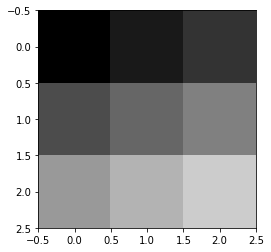

In [1]:
import matplotlib.pyplot as plt

plt.imshow([[0.0, 0.1, 0.2], [0.3, 0.4, 0.5], [0.6, 0.7, 0.8]], cmap=plt.cm.gray, vmin=0, vmax = 1)

In [2]:
import multiprocessing

def square_value(value):
    return value ** 2

try:
    cpu_count = multiprocessing.cpu_count()
except NotImplementedError:
    cpu_count = 2
pool = multiprocessing.Pool(cpu_count)
squared_values = pool.map(square_value, range(5))
print(squared_values)
#pool.close() # This doesn't seem necessary from doc examples. Using it had no effect.

[0, 1, 4, 9, 16]
